In [56]:
# libraries
import csv
import pandas as pd
import numpy as np
from random import shuffle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


## 1. The Dataset: Adult Income

#### The Adult Income dataset is a classification dataset: it is used for a prediction task where the goal is to determine whether a person makes over 50k a year. The list of attributes is as follows:
- output variable: **Income**, <=50k and >50k (converted to 0 and 1 respectively)
- input features: 
    - **Age**: a continuous number
    - **WorkClass**: a categorical variable that represents different work sectors, including values such as Federal employee, Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked, Federal worker
    - **Education**: a categorical variable that represents the level of education, including values such as Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
    - **MaritalStatus**: a categorical variable with values Married-civ-spouse (Married to a civilian spouse), Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse (Married to someone in the Armed Forces) 
    - **Occupation**: a categorical variable with values Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
    - **EducationNum**: a continuous value that represents the level of education (0 = Preschool, 16 = Doctorate)
    - **Race**: a categorical variable with values White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black 
    - **Gender**: a binary variable, includes Female and Male
    - **CapitalGain**: a continuous number
    - **CapitalLoss**: a continuous number
    - **HoursPerWeek**: a categorical variable including hour ranges of 0-30, 30-60, 60-90, 90+
    - **NativeCountry**: a categorical variable including countries such as United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

In [57]:
df = pd.read_csv("adult_income_orig.csv")

df.columns = [
        "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
        "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
        "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]

def convert_hours(x):
    if x < 30:
        return "0-30"
    elif x < 60:
        return "30-60"
    elif x < 90:
        return "60-90"
    else:
        return "90+"

df['HoursPerWeek'] = df['HoursPerWeek'].apply(lambda x: convert_hours(x))

cols = [
        "Age", "WorkClass", "Education","EducationNum", "MaritalStatus", "Occupation", "Race", "Gender",
        "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]
df = df[cols]


train_cols = df.columns[0:-1]
label = df.columns[-1]
X_df = df[train_cols]
y_df = df[label]

#Converting the response / output variable to a binary class
y_df = y_df.apply(lambda x: 0 if x == " <=50K" else 1)

dataset = {
        'X': X_df,
        'y': y_df,
}

#Top 5 rows of the original dataset:
df.head()

,Age,WorkClass,Education,EducationNum,MaritalStatus,Occupation,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,30-60,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,0-30,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,30-60,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,30-60,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,30-60,Cuba,<=50K


In [58]:
# Use this cell for any data-related exploration

## 2. The Model: GAMs

In [59]:
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.model_selection import train_test_split

# create a train/test split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(dataset['X'],dataset['y'], test_size=0.25, random_state=seed)

# train a GAM for the training dataset
ebm = ExplainableBoostingClassifier()

ebm.fit(X_train, y_train)

ExplainableBoostingClassifier(feature_names=['Age', 'WorkClass', 'Education',
                                             'EducationNum', 'MaritalStatus',
                                             'Occupation', 'Race', 'Gender',
                                             'CapitalGain', 'CapitalLoss',
                                             'HoursPerWeek', 'NativeCountry',
                                             'MaritalStatus x Gender',
                                             'EducationNum x MaritalStatus',
                                             'EducationNum x Occupation',
                                             'WorkClass x Race',
                                             'Occupation x HoursPerWeek',
                                             'Age x CapitalLoss',
                                             'EducationNum x Hou...
                                             'EducationNum x NativeCountry',
                                          

In [60]:
#Training accuracy
train_pred = ebm.predict(X_train).tolist()
train_pred = [0 if x<=0.5 else 1 for x in train_pred]
accuracy_train = round(sum(train_pred == y_train) / len(train_pred), 5)

#Test set accuracy
predictions = ebm.predict(X_test).tolist()
predictions = [0 if x <= 0.5 else 1 for x in predictions]

accuracy_test = round(sum(predictions == y_test) / len(predictions), 5)

print("The accuracy of the model on the training set is: ", accuracy_train)
print("The accuracy of the model on the test set is: ", accuracy_test)

indices = [index for index, value in enumerate(zip(predictions, y_test.tolist())) if value[0] != value[1]]

The accuracy of the model on the training set is:  0.87461
The accuracy of the model on the test set is:  0.87397


### Visualize Global Explanations: What the model learned overall from training data

In [61]:
from interpret import show

ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7001/2866243350832/ -->

### Visualize Local Explanations: How an individual prediction was made

In [62]:
ebm_local = ebm.explain_local(X_test[:15], y_test[:15], name = 'EBM')
show(ebm_local)

<!-- http://127.0.0.1:7001/2865824786848/ -->

## 3. Questions
Please answer these to the best of your abilities. Make sure to also answer the follow-up questions in each of the code cells.

If you need to write code to answer the question, please use the code cell provided

If you don't know how to answer a question, please note that to the researcher in the room, explain why you cannot answer the question in the cell, and move on to the next one.

#### Part 1: Familiarity with the Data

In [63]:
## How familiar are you with adult income census data in the United States? 

# If you had to give it a number, on a scale of 1-7 (where 1 = Not at all and 7 = Extremely),
# How would you rate your familiarity? 
    # Response: 

# ---------------------------------------------------------------------------------------------------

## Have you previously interacted with datasets about adult income in the United States? 

# On a scale of 1-7, how would you rate your familiarity with datasets about adult income in the United States? 
    # Response: 

# ---------------------------------------------------------------------------------------------------

## Specifically, have you worked with UCI’s Adult Census Income dataset?  

# On a scale of 1-7, how would you rate your familiarity with the Kaggle dataset?
    # Response: 


#### Part 2: Global feature importance

In [64]:
## Is this feature importance order reasonable for the adult income census data? Why or why not?
# Response: 

# On a scale of 1-7, how reasonable is the feature importance order?
# Response: 

# On a scale of 1-7 (where 1 = Not at all and 7 = Extremely),
# How confident are you that you have understood the explanation correctly?
# Response: 


#### Part 3: Individual feature importance

In [65]:
## How would you describe the relationship between Age and income?
# Response:

## How would you describe the relationship between WorkClass and income?
# Response:

## How would you describe the relationship between EducationNum and income?
# Response:

# On a scale of 1-7 (where 1 = Not at all and 7 = Extremely),
# How confident are you that you have understood these relationships correctly?
# Response: 


#### Part 4: Local predictions

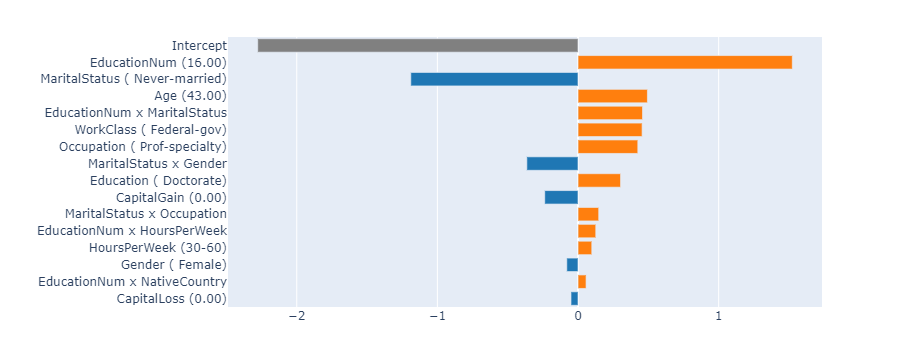

In [66]:
# Given the above input feature values, do you think this individual earned <=50k or >50k USD? Why?
# Response: 

# On a scale of 1-7 (where 1 = Not at all and 7 = Extremely),
# How confident are you that you have understood the explanation correctly?
# Response: 


#### Part 5: Local misclassification

In [54]:
ebm_local = ebm.explain_local(X_test[12:13], y_test[12:13], name='EBM')
show(ebm_local)

<!-- http://127.0.0.1:7001/2866243127376/ -->

In [50]:
# The model misclassified this particular datapoint (above). Why do you think that happened?
# Response: 

# On a scale of 1-7 (where 1 = Not at all and 7 = Extremely),
# How confident are you that you have understood the explanation correctly?
# Response: 


#### Part 6: Reflecting

In [51]:
## On a scale of 1-7, how easy was it to answer these questions about the adult income dataset?
# Response: 

## What made it easy/hard to answer questions about the adult income dataset?
# Response: 

## When answering the questions, were you relying on the visuals alone or was there any prior knowledge you used in your answers?
# Response: 
